In [2]:
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import obspy

In [3]:
pref = "/uufs/chpc.utah.edu/common/home/koper-group1/alysha/Yellowstone/data/waveformArchive/oneCompPdetector"
pref_mew = f"{pref}/constant_bc_width/NGB_onecomp_p_resampled_10s/synthetic_multievent_waveforms"

mew_catalog_file = f"{pref_mew}/trainP.10s.1dup_synthetic_multievent_catalog.df.csv"
mew_summary_file = f"{pref_mew}/trainP.10s.1dup_synthetic_multievent_summary_info.df.csv"

mew_catalog_df = pd.read_csv(mew_catalog_file)
mew_summary_df = pd.read_csv(mew_summary_file)

In [4]:
mew_catalog_df.head()

,evid,network,station,location,channelz,phase,arrival_time,pick_quality,first_motion,take_off_angle,...,event_depth,origin_time,magnitude,magnitude_type,rflag,event_type,original_rows,qc_rows,date,xind
0,60031622,WY,YDC,1.0,EHZ,P,1.374432e+09,1.00,1,93,...,6.57,1.374432e+09,1.17,l,F,le,19058,19058,130721,15034
1,60124397,WY,YDC,1.0,EHZ,P,1.443029e+09,0.75,0,69,...,3.93,1.443029e+09,2.05,l,F,le,78505,78505,150923,54601
2,60340102,UU,PNSU,1.0,HHZ,P,1.568138e+09,0.75,0,43,...,-1.66,1.568138e+09,0.99,d,F,le,193299,193299,190910,146856
3,60474642,UU,PNSU,1.0,HHZ,P,1.640638e+09,1.00,-1,43,...,-1.21,1.640638e+09,1.37,d,F,le,312506,312506,211227,242854
4,60222147,WY,YGC,1.0,EHZ,P,1.501943e+09,1.00,-1,142,...,10.54,1.501943e+09,2.00,l,F,le,126546,126546,170805,93575


In [5]:
rows = mew_catalog_df[(mew_catalog_df.evid==60019487) & (mew_catalog_df.station=="YNR")].index
mew_catalog_df.loc[np.sort(np.concatenate([rows, rows+1]))]

,evid,network,station,location,channelz,phase,arrival_time,pick_quality,first_motion,take_off_angle,...,event_depth,origin_time,magnitude,magnitude_type,rflag,event_type,original_rows,qc_rows,date,xind
7280,60019487,WY,YNR,1.0,HHZ,P,1.366073e+09,1.00,-1,69,...,4.65,1.366073e+09,0.96,l,F,le,10611,10611,130416,8285
7281,60196142,WY,YNR,1.0,HHZ,P,1.494165e+09,1.00,-1,99,...,7.83,1.494165e+09,1.77,l,F,le,105285,105285,170507,76622
35324,60019487,WY,YNR,1.0,HHZ,P,1.366073e+09,1.00,-1,69,...,4.65,1.366073e+09,0.96,l,F,le,10611,10611,130416,8285
35325,60270502,WY,YNR,1.0,HHZ,P,1.519008e+09,0.75,0,98,...,7.15,1.519008e+09,0.89,d,F,le,146132,146132,180219,109144
37200,60019487,WY,YNR,1.0,HHZ,P,1.366073e+09,1.00,-1,69,...,4.65,1.366073e+09,0.96,l,F,le,10611,10611,130416,8285
37201,60270027,WY,YNR,1.0,HHZ,P,1.518968e+09,0.75,0,69,...,4.94,1.518968e+09,1.39,d,F,le,145114,145114,180218,108352
67822,60019487,WY,YNR,1.0,HHZ,P,1.366073e+09,1.00,-1,69,...,4.65,1.366073e+09,0.96,l,F,le,10611,10611,130416,8285
67823,60467982,WY,YNR,1.0,HHZ,P,1.636880e+09,1.00,1,127,...,9.20,1.636880e+09,1.29,l,F,le,308738,308738,211114,239793


In [6]:
pair_catalog_df = mew_catalog_df.loc[[37200, 37201]]
pair_summary_df = mew_summary_df.loc[37200//2:37200//2]
pair_summary_df.head()

,evid1,evid2,network,station,magnitude1,magnitude1_type,magnitude2,magnitude2_type,wf1_T1,wf1_T2,wf2_shift,rescale_factor
18600,60019487,60270027,WY,YNR,0.96,l,1.39,d,333,838,123,2.692212


In [7]:
with h5py.File(f"{pref}/current_earthquake_catalog_1c.h5", "r") as f:
    X = f["X"][pair_catalog_df.original_rows.values]

In [8]:
pair_summary_df

,evid1,evid2,network,station,magnitude1,magnitude1_type,magnitude2,magnitude2_type,wf1_T1,wf1_T2,wf2_shift,rescale_factor
18600,60019487,60270027,WY,YNR,0.96,l,1.39,d,333,838,123,2.692212


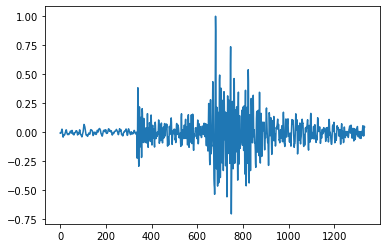

In [9]:
center = 1000
wf1_T1 = pair_summary_df["wf1_T1"].values[0]
rescale_factor = pair_summary_df["rescale_factor"].values[0]
# Normalize by entire trace and rescale
wf1 = ((X[0, center-wf1_T1:]/np.max(abs(X[0, :])))).reshape(-1, 1)
wf1_rescaled = wf1 #(wf1/rescale_factor)
plt.plot(range(0, center+wf1_T1), wf1)

In [45]:
wf1_T1

333

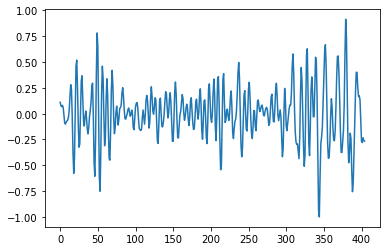

In [31]:
wf1_T2 = pair_summary_df["wf1_T2"].values[0] + 100
# Normalize by entire trace and rescal
wf2 = (X[1, center-10:center+(len(wf1)-wf1_T2)]/np.max(abs(X[1, :])))
plt.plot(range(0, len(wf2)), wf2)

In [32]:
wf1_T2

938

In [33]:
channels = {0:"Z"}
st = obspy.Stream()
for ind in range(1):
    tr = obspy.Trace(np.copy(wf2[:]))
    tr.stats.channel = channels[ind]
    tr.stats.delta = 0.01
    tr.stats.sampling_rate = 100
    st += tr

st.taper(type="cosine", max_percentage=None, max_length=0.09, side="left")
wf2_taper = st[0].data.reshape(-1, 1)

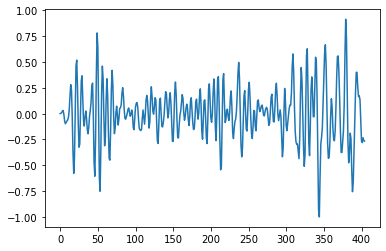

In [34]:
plt.plot(range(len(wf2_taper)), wf2_taper)

In [35]:
wf2_padded = np.zeros_like(wf1)
# Start wf2_buffer before the pick sample
wf2_padded[wf1_T2 - 10:] = wf2_taper

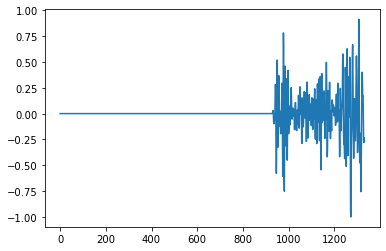

In [36]:
plt.plot(range(len(wf2_padded)), wf2_padded)

In [37]:
combined = wf1_rescaled + wf2_padded

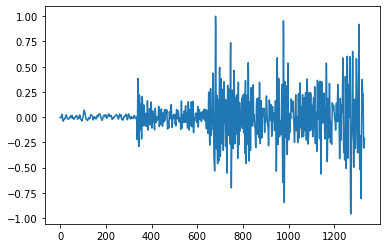

In [38]:
plt.plot(range(len(combined)), combined)

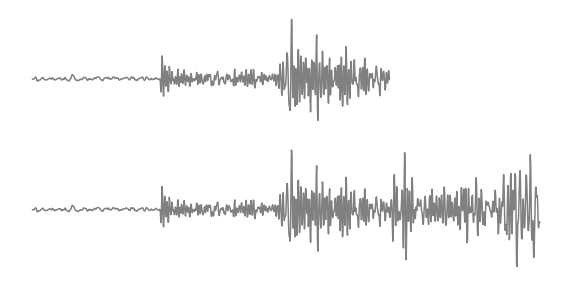

In [41]:
plt.figure(figsize=(10, 5))
plt.plot(range(0, wf1_T2), wf1[:wf1_T2], color="gray")
plt.axis("off")
plt.plot(range(len(combined)), combined-2.2, color="gray")
plt.axis("off")
plt.savefig("sta_lta_ex_closer.png", transparent=2)

In [42]:
trace = obspy.Trace(combined[:, 0])

In [44]:
w1_T2

NameError: name 'w1_T2' is not defined

In [43]:
np.savetxt("combined_sta_lta_ex_closer.txt", combined)

In [28]:
ls

append_mew.py                       out.LG_mew_train
combined_sta_lta_ex                 out.LG_mew_validate
combined_sta_lta_ex.txt             out.LG_onecomp_mew_train
combined_wf_example.png             out.LG_onecomp_mew_validate
create_multievent_examples_best.py  out.mew_train
create_multievent_examples_new.py   out.mew_validate
create_multievent_examples.py       out.onecomp_mew_train
develop_new_mew.ipynb               out.onecomp_mew_validate
develop_new_mew_with_shift.ipynb    sta_lta_ex.png
mew_figure_sta_lta_ex.ipynb         tmp_rouning_error.csv
mew_manuscript_figure.ipynb         WY.YNR.60019487.60270027.dcomb.png
old_log_files/                      WY.YNR.60019487.60270027.png


In [29]:
np.loadtxt("combined_sta_lta_ex.txt")

array([-0.00586371, -0.00454047, -0.00625113, ...,  0.01492129,
        0.24465415,  0.38142958])

In [30]:
pwd

'/uufs/chpc.utah.edu/common/home/u1072028/PycharmProjects/seis-proc-dl/detectors/data_augmentation'

In [ ]:
from obspy.signal.trigger import classic_sta_lta
df = 0.01
cft = classic_sta_lta(trace.data, int(1 * df), int(3 * df))

In [52]:
from obspy.signal.trigger import plot_trigger
plot_trigger(trace, cft, 1.5, 0.5)

'/uufs/chpc.utah.edu/common/home/u1072028/PycharmProjects/seis-proc-dl/detectors/data_augmentation'

In [56]:
boxcar = np.zeros(len(wf1))
boxcar_width = 15
boxcar[wf1_T1 - boxcar_width:wf1_T1 + boxcar_width + 1] = 1
boxcar[wf1_T2 - boxcar_width:wf1_T2 + boxcar_width + 1] = 1

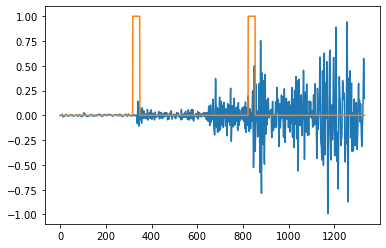

In [57]:
plt.plot(range(len(combined)), combined)
plt.plot(range(len(combined)), boxcar)

In [133]:
wf_length = 1008
random_shift = pair_summary_df["wf2_shift"].values[0]
combined_wf1_centered = np.copy(combined)[0:wf_length]
combined_wf2_centered = np.copy(combined)[random_shift:random_shift + wf_length]

boxcar_wf1_centered = boxcar[0:wf_length]
boxcar_wf2_centered = boxcar[random_shift:random_shift + wf_length]


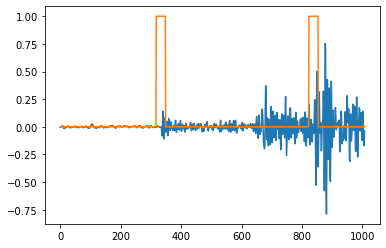

In [59]:
plt.plot(range(wf_length), combined_wf1_centered)
plt.plot(range(wf_length), boxcar_wf1_centered)

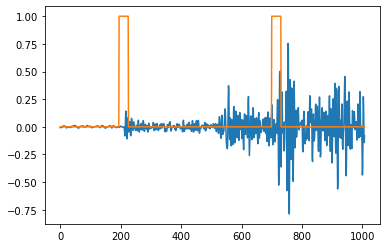

In [60]:
plt.plot(range(wf_length), combined_wf2_centered)
plt.plot(range(wf_length), boxcar_wf2_centered)

In [115]:
pair_summary_df.columns

Index(['evid1', 'evid2', 'network', 'station', 'magnitude1', 'magnitude1_type',
       'magnitude2', 'magnitude2_type', 'wf1_T1', 'wf1_T2', 'wf2_shift',
       'rescale_factor'],
      dtype='object')

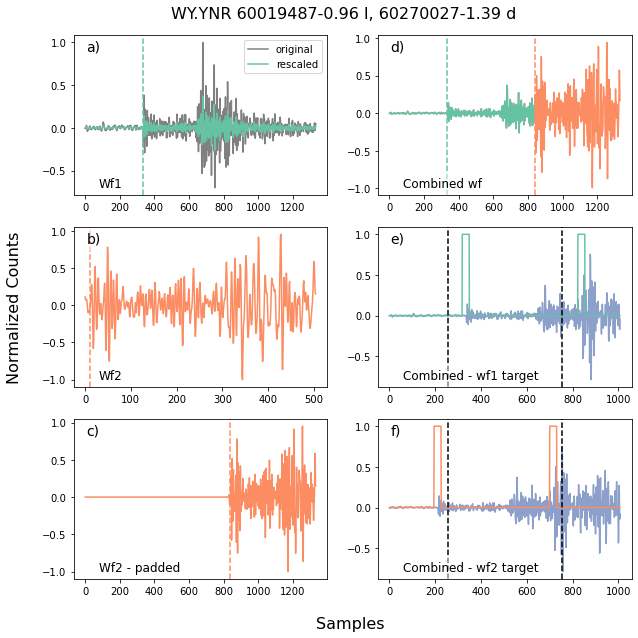

In [144]:
bbox = dict(facecolor="white", alpha=0.5, edgecolor="white")

title = f'{pair_summary_df["network"].values[0]}.{pair_summary_df["station"].values[0]} {pair_summary_df["evid1"].values[0]}-' \
            f'{pair_summary_df["magnitude1"].values[0]} {pair_summary_df["magnitude1_type"].values[0]}, ' \
            f'{pair_summary_df["evid2"].values[0]}-{pair_summary_df["magnitude2"].values[0]} {pair_summary_df["magnitude2_type"].values[0]}'

outname = f'{pair_summary_df["network"].values[0]}.{pair_summary_df["station"].values[0]}.'\
            f'{pair_summary_df["evid1"].values[0]}.{pair_summary_df["evid2"].values[0]}.dcomb.png'

# Text box - word description
text_fontsize = 12
textbox_y = 0.05

# Figure subplot labels
figlabel_y = 0.9
figlabel_x = 0.05
figlabel_size = 14

# wf1_color = "#FFC107"
# wf2_color = "#1E88E5"
# combined_color = "#004D40"

wf1_color = "#66c2a5"
wf2_color = "#fc8d62"
combined_color = "#8da0cb"
center_window_color = "k"

fig, axes = plt.subplots(3, 2, figsize=(10, 10))

axes = axes.flatten(order="F")

axes[0].plot(range(len(wf1)), wf1, color="gray", label="original")
axes[0].plot(range(len(wf1_rescaled)), wf1_rescaled, color=wf1_color, label="rescaled")
axes[0].axvline(wf1_T1, color=wf1_color, linestyle="--")
axes[0].text(0.1, textbox_y, "Wf1", transform=axes[0].transAxes, bbox=bbox,
             fontsize=text_fontsize)
axes[0].text(figlabel_x, figlabel_y, "a)", transform=axes[0].transAxes, bbox=bbox,
             fontsize=figlabel_size)


axes[1].plot(range(len(wf2)), wf2, color=wf2_color)
axes[1].axvline(10, color=wf2_color, linestyle="--")
axes[1].text(0.1, textbox_y, "Wf2", transform=axes[1].transAxes, bbox=bbox,
             fontsize=text_fontsize)
axes[1].text(figlabel_x, figlabel_y, "b)", transform=axes[1].transAxes, bbox=bbox,
             fontsize=figlabel_size)

axes[2].plot(range(len(wf1)), wf2_padded, color=wf2_color)
axes[2].axvline(wf1_T2, color=wf2_color, linestyle="--")
axes[2].text(0.1, textbox_y, "Wf2 - padded", transform=axes[2].transAxes, bbox=bbox,
             fontsize=text_fontsize)
axes[2].text(figlabel_x, figlabel_y, "c)", transform=axes[2].transAxes, bbox=bbox,
             fontsize=figlabel_size)

axes[3].plot(range(len(combined)), combined, color=wf2_color)
## Plot entire wf1
#axes[3].plot(range(len(wf1)), wf1_rescaled, color=wf1_color)
#axes[3].plot(range(wf1_T2), np.zeros(wf1_T2), color=wf2_color)
## Stop WF1 at WF2
axes[3].plot(range(wf1_T2), wf1_rescaled[0:wf1_T2], color=wf1_color)

axes[3].axvline(wf1_T1, color=wf1_color, linestyle="--")
axes[3].axvline(wf1_T2, color=wf2_color, linestyle="--")
axes[3].text(0.1, textbox_y, "Combined wf", transform=axes[3].transAxes, bbox=bbox,
             fontsize=text_fontsize)
axes[3].text(figlabel_x, figlabel_y, "d)", transform=axes[3].transAxes, bbox=bbox,
             fontsize=figlabel_size)

axes[4].plot(range(wf_length), combined_wf1_centered, color=combined_color)
axes[4].plot(range(wf_length), boxcar_wf1_centered, color=wf1_color)
axes[4].axvline(wf_length//2-250, linestyle="--", color=center_window_color)
axes[4].axvline(wf_length//2+250, linestyle="--", color=center_window_color)
axes[4].text(0.1, textbox_y, "Combined - wf1 target", transform=axes[4].transAxes, bbox=bbox,
             fontsize=text_fontsize)
axes[4].text(figlabel_x, figlabel_y, "e)", transform=axes[4].transAxes, bbox=bbox,
             fontsize=figlabel_size)

axes[5].plot(range(wf_length), combined_wf2_centered, color=combined_color)
axes[5].plot(range(wf_length), boxcar_wf2_centered, color=wf2_color)
axes[5].axvline(wf_length//2-250, linestyle="--", color=center_window_color)
axes[5].axvline(wf_length//2+250, linestyle="--", color=center_window_color)
axes[5].text(0.1, textbox_y, "Combined - wf2 target", transform=axes[5].transAxes, bbox=bbox,
             fontsize=text_fontsize)
axes[5].text(figlabel_x, figlabel_y, "f)", transform=axes[5].transAxes, bbox=bbox,
             fontsize=figlabel_size)


axes[5].set_xlabel("Samples", fontsize=16, x=-0.11, labelpad=20)
axes[1].set_ylabel("Normalized Counts", fontsize=16, labelpad=20)
fig.suptitle(title, fontsize=16, y=0.92)
axes[0].legend()

fig.savefig(outname)